In [1]:
cd ~/work/home/feser/work/ocaml-workspace/staged-synth/runs/

/home/jovyan/work/mnt/scratch/metric-synth-runs


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm
from shared import load, plot_ablations, method_table, construct_table

plt.rcParams.update(
    {
        "font.family": "serif",
        "text.usetex": True,
        "pgf.rcfonts": False,
        "pgf.preamble": "\n".join(
            [r"\documentclass[acmsmall,review,timestamp]{acmart}"]
        ),
    }
)

In [45]:
df = pd.concat([load('2022-07-06-17:52:38'), load('towers-enum')])

100%|██████████████████████████████████████████████████| 71/71 [00:00<00:00, 20673.07it/s]


In [60]:
df

,program_size,timeout
count,19.000000,68.000000
mean,20.789474,0.220588
std,7.322560,0.417726
min,12.000000,0.000000
25%,15.000000,0.000000
50%,20.000000,0.000000
75%,27.000000,0.000000
max,37.000000,1.000000


In [58]:
n_bench = 34
baseline_perc = 0.575
baseline_solved = (40 * baseline_perc)
baseline_solved

23.0

<Figure size 432x288 with 0 Axes>

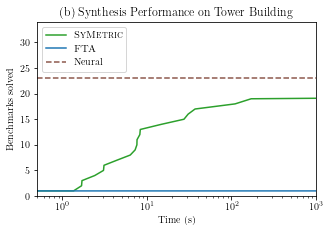

In [57]:
def plot():
    plt.tight_layout()
    fig = plt.figure(figsize=(5, 3.2))
    ax = fig.add_subplot(1, 1, 1)

    std = df[
        (df["extract"] == "Greedy")
        & (df["repair"] == "Guided")
        & (df["threshold"] > 0)
        & (df["rank"])
    ]["runtime"]
    std = std.sort_values().fillna(1e10)
    ax.plot(
        [0] + list(std), range(0, len(std) + 1), label=r"\textsc{SyMetric}", color="C2"
    )
    
    std = df[(df["method"] == "enum")]["runtime"]
    std = std.sort_values().fillna(1e10)
    ax.plot(
        [0] + list(std), range(0, len(std) + 1), label=r"\textsc{FTA}", color="C0"
    )
    
    ax.axhline(y=baseline_solved, linestyle='--', label='Neural', color='C5') # horizontal

    ax.set_ylim([0, n_bench])
    ax.set_xlim([0.5, 1e3])
    ax.set_xscale('log')
    ax.set_ylabel("Benchmarks solved")
    ax.set_xlabel("Time (s)")
    plt.legend(loc="upper left")
    ax.set_title(r"(b) Synthesis Performance on Tower Building")
    plt.savefig('/home/jovyan/work/home/feser/metric_synth/towers_comparison.pdf')
plot()

In [15]:
with open('/home/jovyan/work/home/feser/metric_synth/towers_method_times.tex', 'w') as f:
    method_table(df, file=f)
with open('/home/jovyan/work/home/feser/metric_synth/towers_construct_times.tex', 'w') as f:
    construct_table(df, file=f)

/home/jovyan/work/home/feser/work/ocaml-workspace/staged-synth/notebooks/shared.py:191: FutureWarning: ['method', 'bench', 'filename', 'extract', 'repair'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df = df[df["success"]].agg(["median", "max"])
/home/jovyan/work/home/feser/work/ocaml-workspace/staged-synth/notebooks/shared.py:218: FutureWarning: ['method', 'bench', 'filename', 'extract', 'repair'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df = df[df["success"]].agg(["median", "max"])


In [9]:
df

,method,bench,max_cost,n_groups,threshold,success,runtime,program_size,timeout,local_search_steps,...,backward_pass_repeats,extract,repair,rank,repair_time,xfta_time,cluster_time,extract_time,rank_time,expansion_time
44,metric,test0.sexp,40,100,0.4,True,6.061898,13.0,0.0,100,...,10,Greedy,Guided,True,0.0,0.0,0.416365,0.0,0.006119,2.806138
49,metric,test0.sexp,40,100,0.4,False,NaN,NaN,1.0,100,...,10,Greedy,Guided,False,0.0,0.0,0.937903,0.0,0.000000,0.000200
78,metric,test0.sexp,40,100,0.4,True,5.807236,13.0,0.0,100,...,10,Random,Guided,True,0.0,0.0,0.355066,0.0,0.005897,2.765081
80,metric,test0.sexp,40,100,0.0,True,13.924982,15.0,0.0,100,...,10,Greedy,Guided,True,0.0,0.0,0.008149,0.0,0.000587,7.084820
151,metric,test0.sexp,40,100,0.4,True,2.187748,13.0,0.0,100,...,10,Greedy,Random,True,0.0,0.0,0.217778,0.0,0.005996,0.948018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,metric,test9.sexp,40,100,0.4,True,3.619798,15.0,0.0,100,...,10,Random,Guided,True,0.0,0.0,0.317599,0.0,0.005392,1.711752
42,metric,test9.sexp,40,100,0.4,False,NaN,NaN,1.0,100,...,10,Greedy,Guided,False,0.0,0.0,0.465222,0.0,0.000000,0.000838
95,metric,test9.sexp,40,100,0.4,True,3.531679,15.0,0.0,100,...,10,Greedy,Guided,True,0.0,0.0,0.316977,0.0,0.005540,1.650065
96,metric,test9.sexp,40,100,0.4,True,3.589327,15.0,0.0,100,...,10,Greedy,Random,True,0.0,0.0,0.318941,0.0,0.006576,1.701823


In [55]:
text = """
   0   24   75 bench/tower/test0.sexp
   0   24   75 bench/tower/test1.sexp
   0   24   75 bench/tower/test2.sexp
   0   24   75 bench/tower/test3.sexp
   0   24   75 bench/tower/test4.sexp
   0   24   75 bench/tower/test5.sexp
   0   24   75 bench/tower/test6.sexp
   0   24   75 bench/tower/test7.sexp
   0   24   75 bench/tower/test8.sexp
   0   24   75 bench/tower/test9.sexp
   0   24   75 bench/tower/test10.sexp
   0   24   75 bench/tower/test11.sexp
   0   31  110 bench/tower/test12.sexp
   0   31  110 bench/tower/test13.sexp
   0   31  110 bench/tower/test14.sexp
   0   31  110 bench/tower/test15.sexp
   0   28   87 bench/tower/test16.sexp
   0   28   87 bench/tower/test17.sexp
   0   28   87 bench/tower/test18.sexp
   0   28   87 bench/tower/test19.sexp
   0   28   87 bench/tower/test20.sexp
   0   28   87 bench/tower/test21.sexp
   0   27   89 bench/tower/test22.sexp
   0   27   89 bench/tower/test23.sexp
   0   27   89 bench/tower/test24.sexp
   0   27   89 bench/tower/test25.sexp
   0   27   89 bench/tower/test26.sexp
   0   27   89 bench/tower/test27.sexp
   0   27   89 bench/tower/test28.sexp
   0   31  109 bench/tower/test29.sexp
   0   29   97 bench/tower/test30.sexp
   0   33  105 bench/tower/test31.sexp
   0   31  101 bench/tower/test32.sexp
   0   31  101 bench/tower/test33.sexp
"""
np.mean([float(l.split()[1]) for l in text.strip().split('\n')])

27.176470588235293